In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn

Veri Okuma

In [2]:
dataFrame = pd.read_csv('maaslar.csv')
dataFrame.head() ## Verilere genel bakış(kolonları sütünları görmek için)

,unvan,Egitim Seviyesi,maas
0,Cayci,1,2250
1,Sekreter,2,2500
2,Uzman Yardimcisi,3,3000
3,Uzman,4,4000
4,Proje Yoneticisi,5,5500


Veriyi Anlamak

In [3]:
dataFrame.describe() ## Verinin istatistikleri

,Egitim Seviyesi,maas
count,10.00000,10.000000
mean,5.50000,12475.000000
std,3.02765,14968.694183
min,1.00000,2250.000000
25%,3.25000,3250.000000
50%,5.50000,6500.000000
75%,7.75000,13750.000000
max,10.00000,50000.000000


In [4]:
dataFrame.isnull().sum() ## Null verilerin kontrolü

unvan              0
Egitim Seviyesi    0
maas               0
dtype: int64

Grafiksel Analiz

<AxesSubplot:xlabel='Egitim Seviyesi', ylabel='maas'>

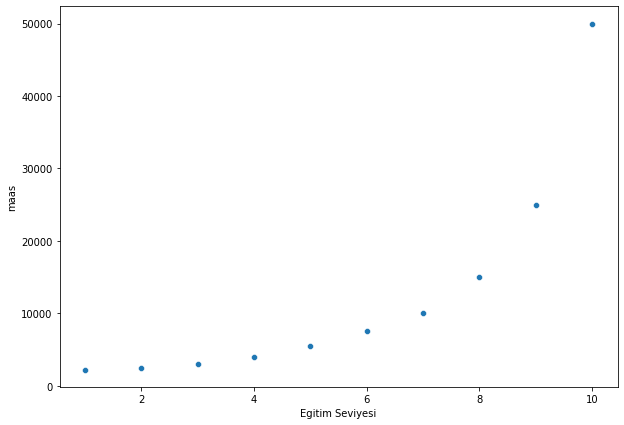

In [5]:
plt.figure(figsize=(10,7)) ## exponansiyel(üstsel) artış
sbn.scatterplot(x='Egitim Seviyesi',y='maas',data=dataFrame) ## Noktasal grafik

Model Oluşturma ## Scale kesinlikle yapılmalı!

In [6]:
y = dataFrame.iloc[:,2:3].values ## Maas
x = dataFrame.iloc[:,1:2].values ## Egitim seviyesi

In [7]:
from sklearn.preprocessing import StandardScaler
## SVR outlayer(marjınal) verilere karşı zayıftır o yuzden kesınlıkle scale edılmeli

In [8]:
standardScaler = StandardScaler()
x_scaler = standardScaler.fit_transform(x)
y_scaler = standardScaler.fit_transform(y)

In [9]:
from sklearn.svm import SVR

'rbf' : radial bases func => gauss

In [10]:
svr_reg = SVR(kernel = 'rbf')
svr_reg.fit(x_scaler,y_scaler)

SVR()

linear

In [11]:
svr_reg1 = SVR(kernel = 'linear')
svr_reg1.fit(x_scaler,y_scaler)

SVR(kernel='linear')

polinomial

In [12]:
svr_reg2 = SVR(kernel = 'poly')
svr_reg2.fit(x_scaler,y_scaler)

SVR(kernel='poly')

In [13]:
guess = svr_reg.predict(x_scaler) ## x_scale rgöre tahmin
guess ## Tahmin verisi

array([-0.61985717, -0.629033  , -0.56735658, -0.49662252, -0.44630564,
       -0.36590427, -0.14129748,  0.28510258,  0.78163737,  1.08500645])

In [14]:
from sklearn.metrics import r2_score

In [15]:
r2_score(y_scaler,guess) ## 'rbf'

0.7513836788854973

In [16]:
guess1 = svr_reg1.predict(x_scaler) ## x_scale rgöre tahmin
guess ## Tahmin verisi

array([-0.61985717, -0.629033  , -0.56735658, -0.49662252, -0.44630564,
       -0.36590427, -0.14129748,  0.28510258,  0.78163737,  1.08500645])

In [17]:
r2_score(y_scaler,guess1) ## 'linear'

0.45378133514512586

In [18]:
guess2 = svr_reg2.predict(x_scaler) ## x_scale rgöre tahmin
guess ## Tahmin verisi

array([-0.61985717, -0.629033  , -0.56735658, -0.49662252, -0.44630564,
       -0.36590427, -0.14129748,  0.28510258,  0.78163737,  1.08500645])

In [19]:
r2_score(y_scaler,guess2) ## 'poly'

0.6453634282115164

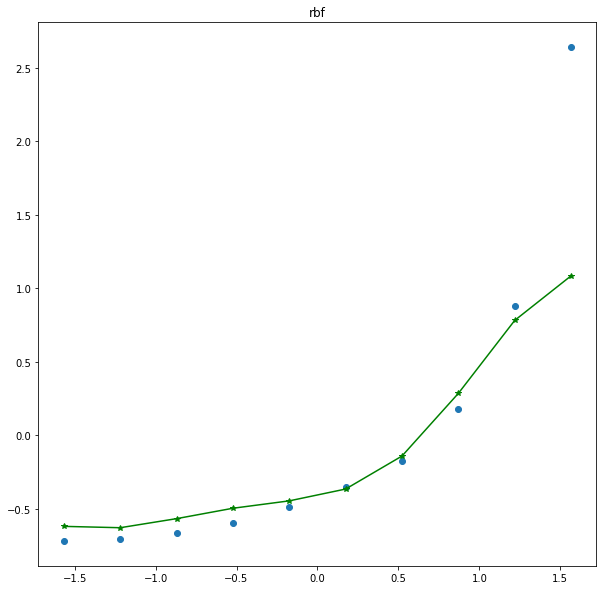

In [20]:
plt.figure(figsize=(10,10))
plt.scatter(x_scaler,y_scaler)
plt.title('rbf')
plt.plot(x_scaler,guess,'g-*')

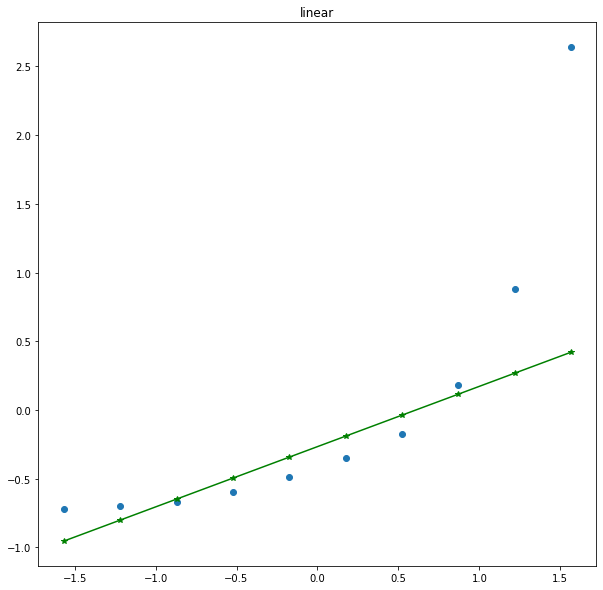

In [21]:
plt.figure(figsize=(10,10))
plt.scatter(x_scaler,y_scaler)
plt.title('linear')
plt.plot(x_scaler,guess1,'g-*')

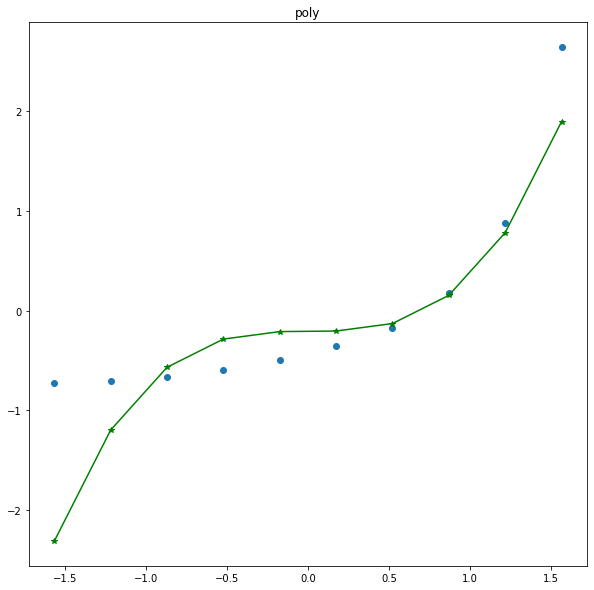

In [22]:
plt.figure(figsize=(10,10))
plt.scatter(x_scaler,y_scaler)
plt.title('poly')
plt.plot(x_scaler,guess2,'g-*')